In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("train.csv")


In [6]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [7]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [8]:
df=df.drop(["User_ID","Product_ID"],axis=1)


In [9]:
df.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [10]:
df=df.dropna()


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166821 entries, 1 to 545914
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      166821 non-null  object 
 1   Age                         166821 non-null  object 
 2   Occupation                  166821 non-null  int64  
 3   City_Category               166821 non-null  object 
 4   Stay_In_Current_City_Years  166821 non-null  object 
 5   Marital_Status              166821 non-null  int64  
 6   Product_Category_1          166821 non-null  int64  
 7   Product_Category_2          166821 non-null  float64
 8   Product_Category_3          166821 non-null  float64
 9   Purchase                    166821 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 14.0+ MB


In [12]:
df.describe()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000
mean,8.178886,0.402839,2.742766,6.896871,12.668243,11658.114980
std,6.487522,0.490470,2.573969,4.500288,4.125338,5082.287959
min,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,2.000000,0.000000,1.000000,2.000000,9.000000,7869.000000
50%,7.000000,0.000000,1.000000,6.000000,14.000000,11756.000000
75%,14.000000,1.000000,4.000000,10.000000,16.000000,15626.000000
max,20.000000,1.000000,15.000000,16.000000,18.000000,23959.000000


In [13]:
df.shape

(166821, 10)

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation'>

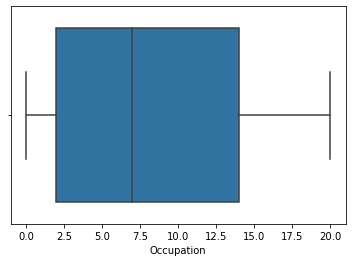

In [14]:
sns.boxplot(df['Occupation'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marital_Status'>

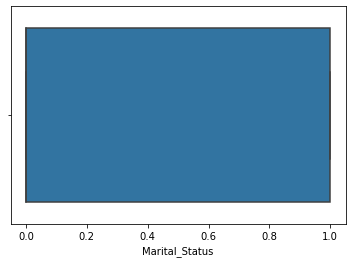

In [15]:
sns.boxplot(df['Marital_Status'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1'>

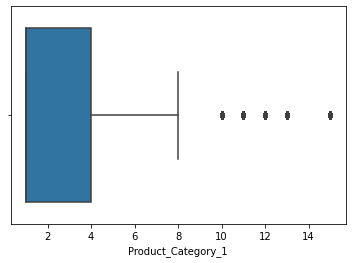

In [16]:
sns.boxplot(df['Product_Category_1'])

In [17]:
q1=df['Product_Category_1'].quantile(0.25)

In [18]:
q3=df['Product_Category_1'].quantile(0.75)

In [19]:
IQR=q3-q1

In [20]:
lower=q1-1.5*IQR

In [21]:
upper=q3+1.5*IQR

In [22]:
df=df[(df['Product_Category_1']>lower) & (df['Product_Category_1']<upper)]

In [23]:
df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
6,M,46-50,7,B,2,1,1,8.0,17.0,19215
13,M,26-35,20,A,1,1,1,2.0,5.0,15665
14,F,51-55,9,A,1,0,5,8.0,14.0,5378
16,F,51-55,9,A,1,0,2,3.0,4.0,13055
...,...,...,...,...,...,...,...,...,...,...
545902,F,46-50,0,B,4+,1,3,4.0,12.0,8047
545904,M,26-35,6,B,2,0,6,8.0,14.0,16493
545907,M,26-35,6,B,2,0,2,3.0,10.0,3425
545908,M,26-35,6,B,2,0,1,2.0,15.0,15694


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1'>

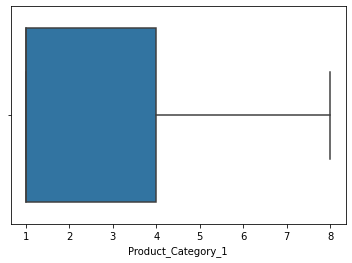

In [24]:
sns.boxplot(df['Product_Category_1'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2'>

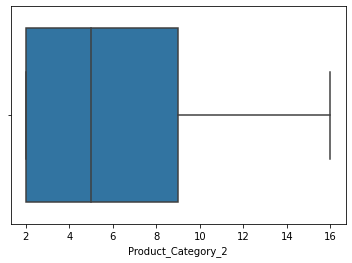

In [25]:
sns.boxplot(df['Product_Category_2'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3'>

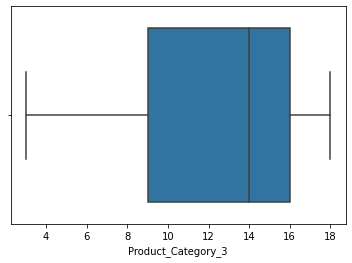

In [26]:
sns.boxplot(df['Product_Category_3'])

In [27]:
df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
6,M,46-50,7,B,2,1,1,8.0,17.0,19215
13,M,26-35,20,A,1,1,1,2.0,5.0,15665
14,F,51-55,9,A,1,0,5,8.0,14.0,5378
16,F,51-55,9,A,1,0,2,3.0,4.0,13055
...,...,...,...,...,...,...,...,...,...,...
545902,F,46-50,0,B,4+,1,3,4.0,12.0,8047
545904,M,26-35,6,B,2,0,6,8.0,14.0,16493
545907,M,26-35,6,B,2,0,2,3.0,10.0,3425
545908,M,26-35,6,B,2,0,1,2.0,15.0,15694


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

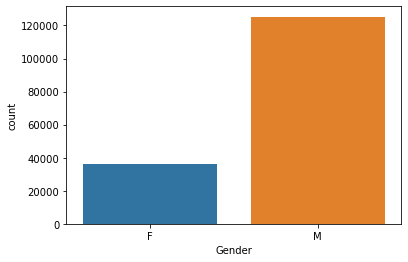

In [28]:
sns.countplot(df['Gender'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

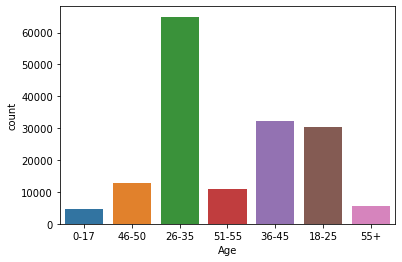

In [29]:
sns.countplot(df['Age'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='count'>

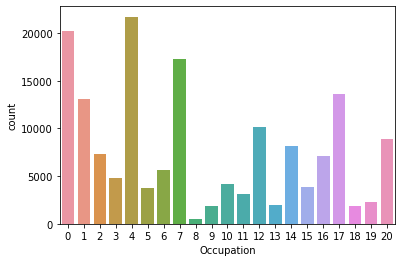

In [30]:
sns.countplot(df['Occupation'])

<AxesSubplot:xlabel='City_Category', ylabel='count'>

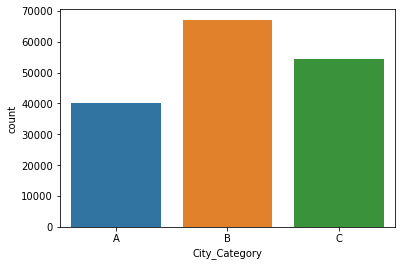

In [31]:
sns.countplot(x=df['City_Category'])

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

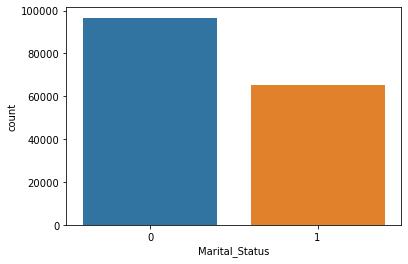

In [32]:
sns.countplot(x=df['Marital_Status'])

Here,

0 → F

1 → M

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

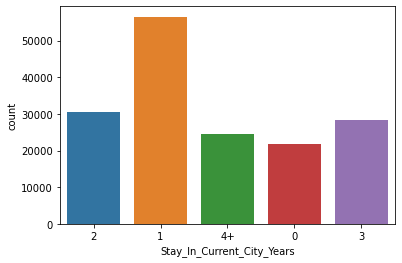

In [33]:
sns.countplot(x=df['Stay_In_Current_City_Years'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

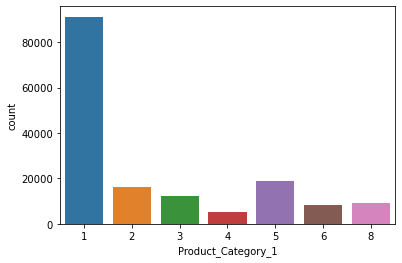

In [34]:
sns.countplot(df['Product_Category_1'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='count'>

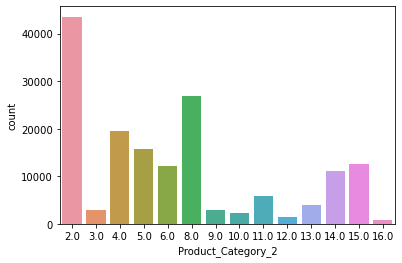

In [35]:
sns.countplot(df['Product_Category_2'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3', ylabel='count'>

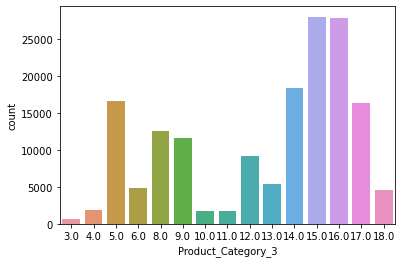

In [36]:
sns.countplot(df['Product_Category_3'])

In [37]:
df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
6,M,46-50,7,B,2,1,1,8.0,17.0,19215
13,M,26-35,20,A,1,1,1,2.0,5.0,15665
14,F,51-55,9,A,1,0,5,8.0,14.0,5378
16,F,51-55,9,A,1,0,2,3.0,4.0,13055
...,...,...,...,...,...,...,...,...,...,...
545902,F,46-50,0,B,4+,1,3,4.0,12.0,8047
545904,M,26-35,6,B,2,0,6,8.0,14.0,16493
545907,M,26-35,6,B,2,0,2,3.0,10.0,3425
545908,M,26-35,6,B,2,0,1,2.0,15.0,15694


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

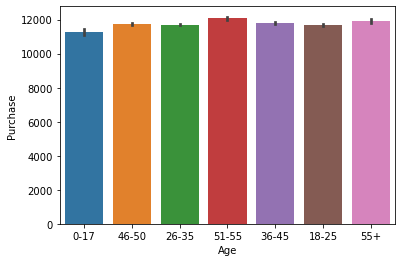

In [38]:
sns.barplot(x=df['Age'],y=df['Purchase'])

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

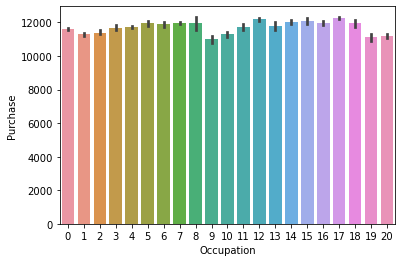

In [39]:
sns.barplot(x=df['Occupation'],y=df['Purchase'])

<AxesSubplot:xlabel='City_Category', ylabel='Purchase'>

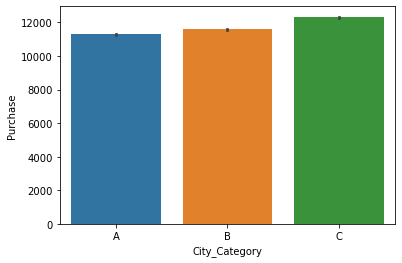

In [40]:
sns.barplot(x=df['City_Category'],y=df['Purchase'])

<AxesSubplot:xlabel='Marital_Status', ylabel='Purchase'>

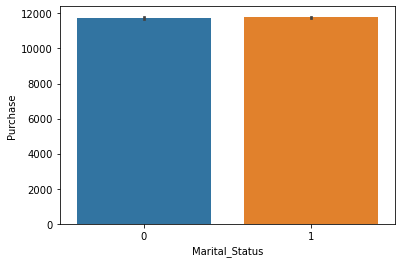

In [41]:
sns.barplot(x=df['Marital_Status'],y=df['Purchase'])

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

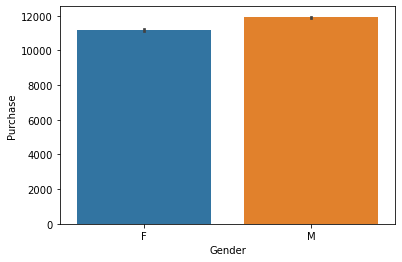

In [42]:
sns.barplot(x=df['Gender'],y=df['Purchase'])

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='Purchase'>

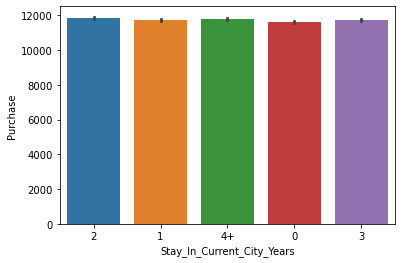

In [43]:
sns.barplot(x=df['Stay_In_Current_City_Years'],y=df['Purchase'])

In [44]:
df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
6,M,46-50,7,B,2,1,1,8.0,17.0,19215
13,M,26-35,20,A,1,1,1,2.0,5.0,15665
14,F,51-55,9,A,1,0,5,8.0,14.0,5378
16,F,51-55,9,A,1,0,2,3.0,4.0,13055
...,...,...,...,...,...,...,...,...,...,...
545902,F,46-50,0,B,4+,1,3,4.0,12.0,8047
545904,M,26-35,6,B,2,0,6,8.0,14.0,16493
545907,M,26-35,6,B,2,0,2,3.0,10.0,3425
545908,M,26-35,6,B,2,0,1,2.0,15.0,15694


In [45]:
label_df=df.groupby('Product_Category_1')['Purchase'].mean().sort_values(ascending=False).index

In [46]:
value_df=df.groupby('Product_Category_1')['Purchase'].mean().sort_values(ascending=False).values

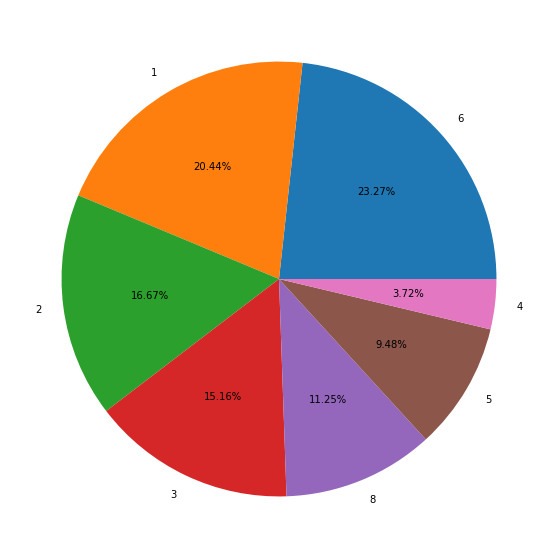

In [47]:
plt.figure(figsize=(10,10))
plt.pie(x=value_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [48]:
label_df=df.groupby('Product_Category_2')['Purchase'].mean().sort_values(ascending=False).index

In [49]:
value_df=df.groupby('Product_Category_2')['Purchase'].mean().sort_values(ascending=False).values

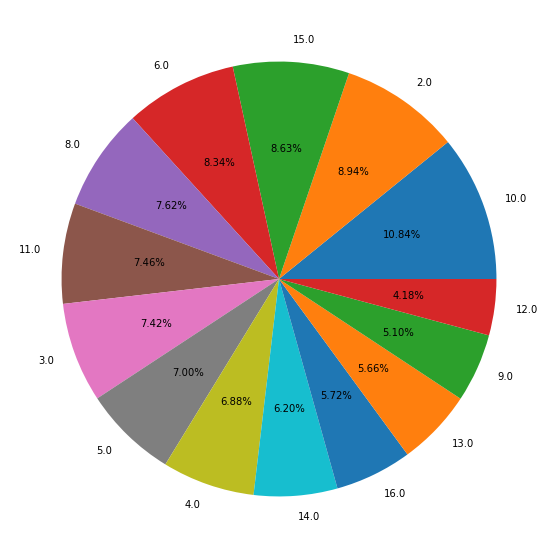

In [50]:
plt.figure(figsize=(10,10))
plt.pie(x=value_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [51]:
label_df=df.groupby('Product_Category_3')['Purchase'].mean().sort_values(ascending=False).index

In [52]:
value_df=df.groupby('Product_Category_3')['Purchase'].mean().sort_values(ascending=False).values

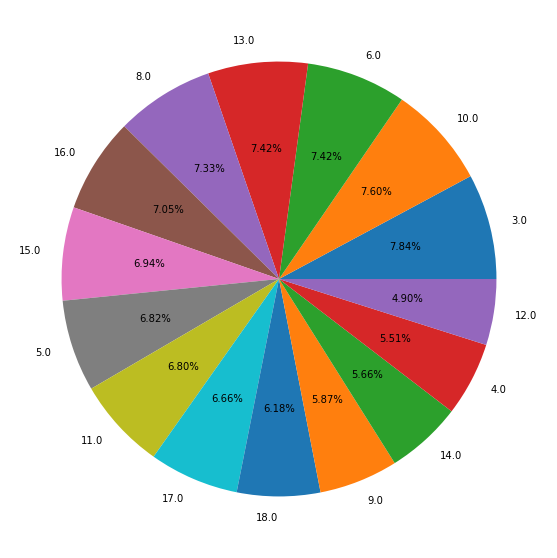

In [53]:
plt.figure(figsize=(10,10))
plt.pie(x=value_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [54]:
df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
6,M,46-50,7,B,2,1,1,8.0,17.0,19215
13,M,26-35,20,A,1,1,1,2.0,5.0,15665
14,F,51-55,9,A,1,0,5,8.0,14.0,5378
16,F,51-55,9,A,1,0,2,3.0,4.0,13055
...,...,...,...,...,...,...,...,...,...,...
545902,F,46-50,0,B,4+,1,3,4.0,12.0,8047
545904,M,26-35,6,B,2,0,6,8.0,14.0,16493
545907,M,26-35,6,B,2,0,2,3.0,10.0,3425
545908,M,26-35,6,B,2,0,1,2.0,15.0,15694


# Sales analysis for Age group 26-35

In [55]:
age_group_df=df.groupby("Age").get_group("26-35")


In [56]:
age_group_df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
13,M,26-35,20,A,1,1,1,2.0,5.0,15665
19,M,26-35,12,C,4+,1,1,5.0,15.0,19614
24,M,26-35,12,C,4+,1,1,8.0,14.0,11927
28,M,26-35,17,C,0,0,5,8.0,14.0,5391
48,F,26-35,1,C,1,0,1,2.0,5.0,19327
...,...,...,...,...,...,...,...,...,...,...
545890,F,26-35,15,B,4+,1,1,2.0,15.0,7846
545904,M,26-35,6,B,2,0,6,8.0,14.0,16493
545907,M,26-35,6,B,2,0,2,3.0,10.0,3425
545908,M,26-35,6,B,2,0,1,2.0,15.0,15694


<AxesSubplot:xlabel='Gender', ylabel='count'>

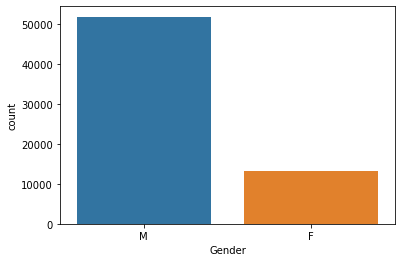

In [57]:
sns.countplot(x=age_group_df['Gender'])

<AxesSubplot:xlabel='Occupation', ylabel='count'>

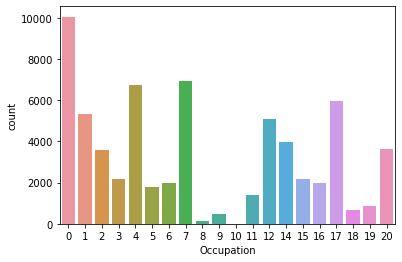

In [58]:
sns.countplot(x=age_group_df['Occupation'])

<AxesSubplot:xlabel='City_Category', ylabel='count'>

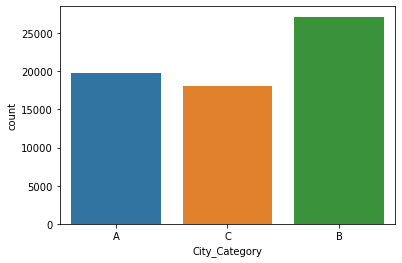

In [59]:
sns.countplot(x=age_group_df['City_Category'])

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

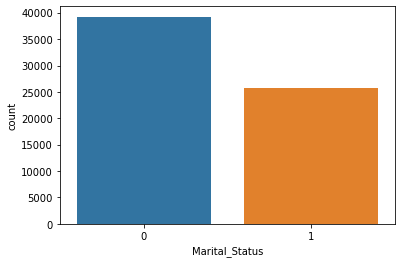

In [60]:
sns.countplot(x=age_group_df['Marital_Status'])

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

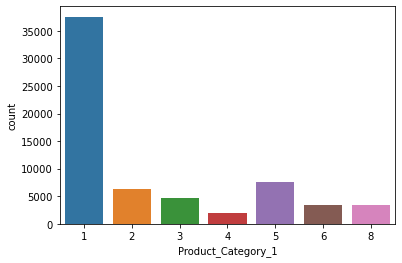

In [61]:
sns.countplot(x=age_group_df['Product_Category_1'])

<AxesSubplot:xlabel='Product_Category_2', ylabel='count'>

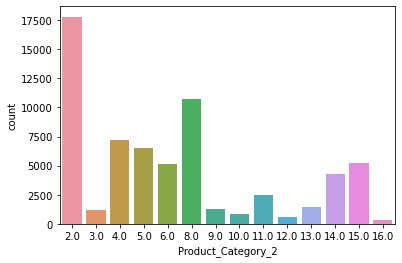

In [62]:
sns.countplot(x=age_group_df['Product_Category_2'])

<AxesSubplot:xlabel='Product_Category_3', ylabel='count'>

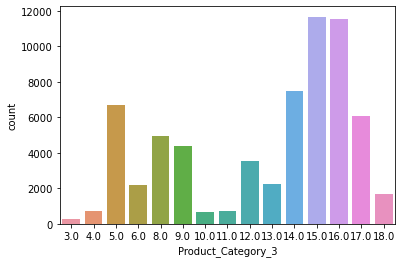

In [63]:
sns.countplot(x=age_group_df['Product_Category_3'])

In [64]:
label_df=age_group_df.groupby('Product_Category_1')['Purchase'].mean().sort_values(ascending=False).index

In [65]:
value_df=age_group_df.groupby('Product_Category_1')['Purchase'].mean().sort_values(ascending=False).values

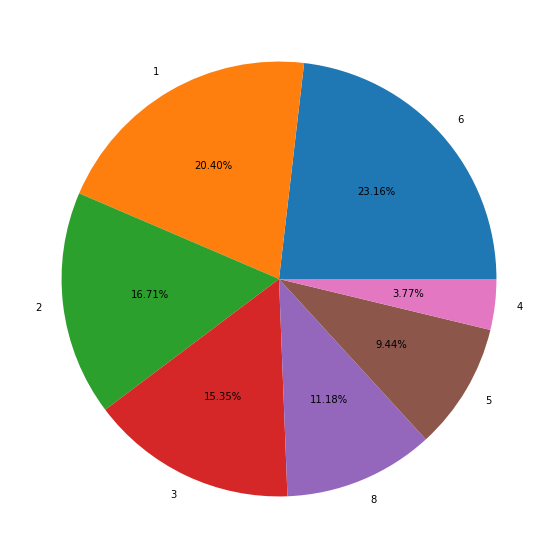

In [66]:
plt.figure(figsize=(10,10))
plt.pie(x=value_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [67]:
label_df=age_group_df.groupby('Product_Category_2')['Purchase'].mean().sort_values(ascending=False).index

In [68]:
value_df=age_group_df.groupby('Product_Category_2')['Purchase'].mean().sort_values(ascending=False).values

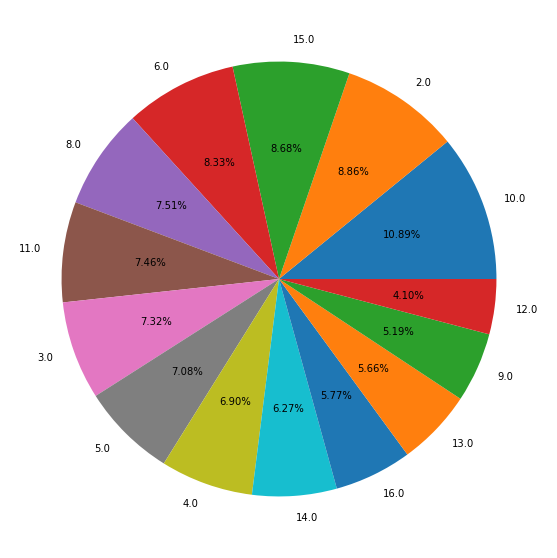

In [69]:
plt.figure(figsize=(10,10))
plt.pie(x=value_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [70]:
label_df=age_group_df.groupby('Product_Category_3')['Purchase'].mean().sort_values(ascending=False).index

In [71]:
value_df=age_group_df.groupby('Product_Category_3')['Purchase'].mean().sort_values(ascending=False).values

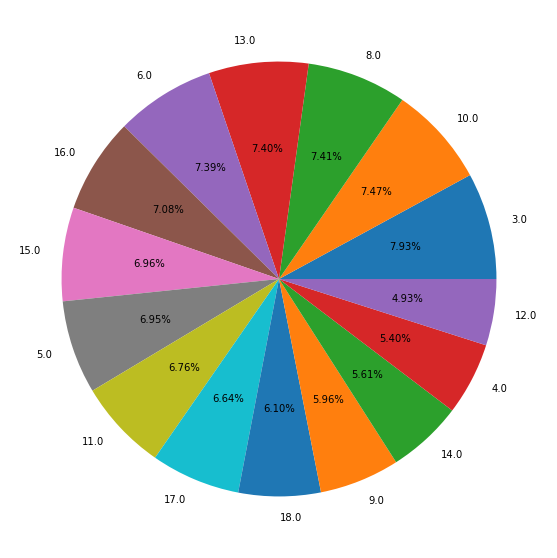

In [72]:
plt.figure(figsize=(10,10))
plt.pie(x=value_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [73]:
df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
6,M,46-50,7,B,2,1,1,8.0,17.0,19215
13,M,26-35,20,A,1,1,1,2.0,5.0,15665
14,F,51-55,9,A,1,0,5,8.0,14.0,5378
16,F,51-55,9,A,1,0,2,3.0,4.0,13055
...,...,...,...,...,...,...,...,...,...,...
545902,F,46-50,0,B,4+,1,3,4.0,12.0,8047
545904,M,26-35,6,B,2,0,6,8.0,14.0,16493
545907,M,26-35,6,B,2,0,2,3.0,10.0,3425
545908,M,26-35,6,B,2,0,1,2.0,15.0,15694


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

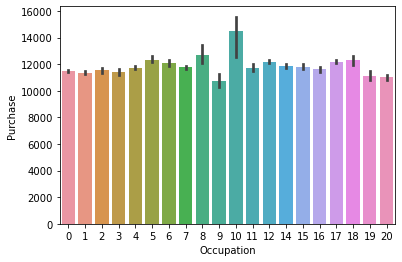

In [74]:
sns.barplot(x=age_group_df['Occupation'],y=age_group_df['Purchase'])

<AxesSubplot:xlabel='City_Category', ylabel='Purchase'>

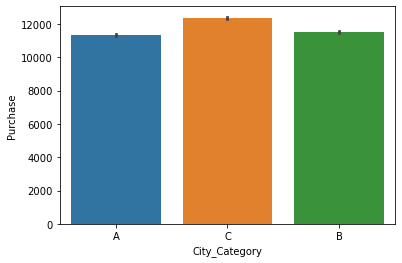

In [75]:
sns.barplot(x=age_group_df['City_Category'],y=age_group_df['Purchase'])

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

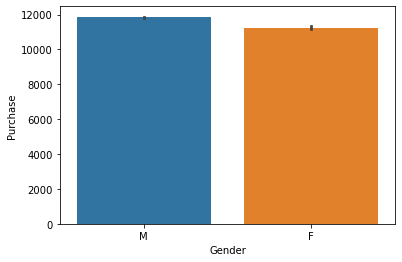

In [76]:
sns.barplot(x=age_group_df['Gender'],y=age_group_df['Purchase'])

<AxesSubplot:xlabel='Marital_Status', ylabel='Purchase'>

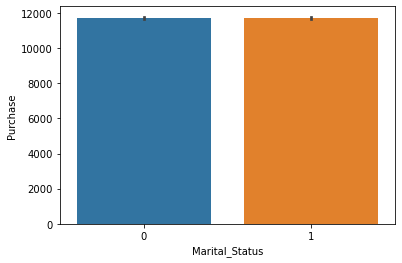

In [77]:
sns.barplot(x=age_group_df['Marital_Status'],y=age_group_df['Purchase'])

In [78]:
df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
6,M,46-50,7,B,2,1,1,8.0,17.0,19215
13,M,26-35,20,A,1,1,1,2.0,5.0,15665
14,F,51-55,9,A,1,0,5,8.0,14.0,5378
16,F,51-55,9,A,1,0,2,3.0,4.0,13055
...,...,...,...,...,...,...,...,...,...,...
545902,F,46-50,0,B,4+,1,3,4.0,12.0,8047
545904,M,26-35,6,B,2,0,6,8.0,14.0,16493
545907,M,26-35,6,B,2,0,2,3.0,10.0,3425
545908,M,26-35,6,B,2,0,1,2.0,15.0,15694


# Sales Analysis for City Category A 

In [79]:
city_category_df=df.groupby("City_Category").get_group("A")

In [80]:
city_category_df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
13,M,26-35,20,A,1,1,1,2.0,5.0,15665
14,F,51-55,9,A,1,0,5,8.0,14.0,5378
16,F,51-55,9,A,1,0,2,3.0,4.0,13055
64,M,26-35,7,A,1,0,1,2.0,6.0,11458
...,...,...,...,...,...,...,...,...,...,...
545796,M,26-35,0,A,4+,0,1,2.0,16.0,8299
545814,M,26-35,12,A,0,1,1,2.0,5.0,19683
545817,M,26-35,12,A,0,1,1,8.0,14.0,19540
545844,M,46-50,7,A,3,0,1,11.0,15.0,19325


<AxesSubplot:xlabel='Gender', ylabel='count'>

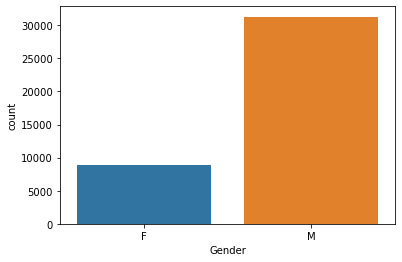

In [81]:
sns.countplot(x=city_category_df['Gender'])

<AxesSubplot:xlabel='Occupation', ylabel='count'>

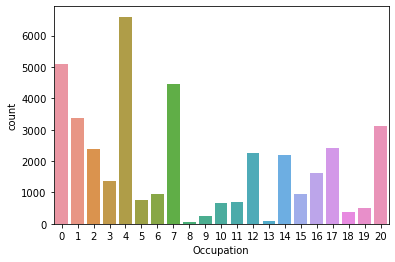

In [82]:
sns.countplot(x=city_category_df['Occupation'])

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

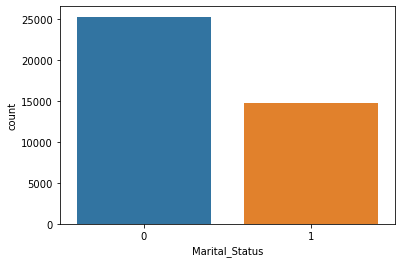

In [83]:
sns.countplot(x=city_category_df['Marital_Status'])

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

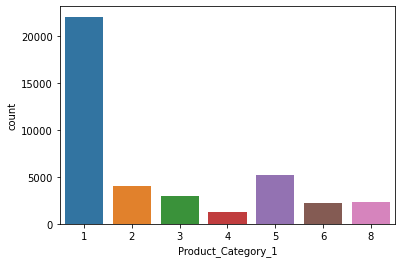

In [84]:
sns.countplot(x=city_category_df['Product_Category_1'])

<AxesSubplot:xlabel='Product_Category_2', ylabel='count'>

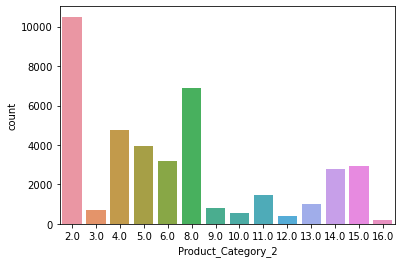

In [85]:
sns.countplot(x=city_category_df['Product_Category_2'])

<AxesSubplot:xlabel='Product_Category_3', ylabel='count'>

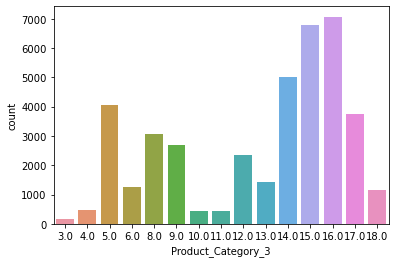

In [86]:
sns.countplot(x=city_category_df['Product_Category_3'])

In [87]:
label_df=city_category_df.groupby('Product_Category_1')['Purchase'].mean().sort_values(ascending=False).index

In [88]:
value_df=city_category_df.groupby('Product_Category_1')['Purchase'].mean().sort_values(ascending=False).values

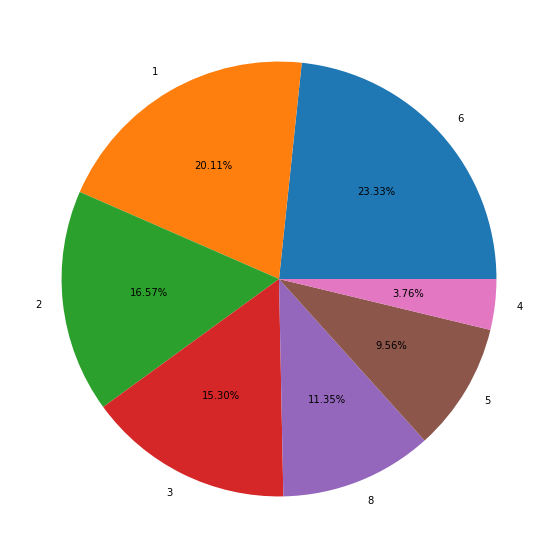

In [89]:
plt.figure(figsize=(10,10))
plt.pie(x=value_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [90]:
label_df=city_category_df.groupby('Product_Category_2')['Purchase'].mean().sort_values(ascending=False).index

In [91]:
value_df=city_category_df.groupby('Product_Category_2')['Purchase'].mean().sort_values(ascending=False).values

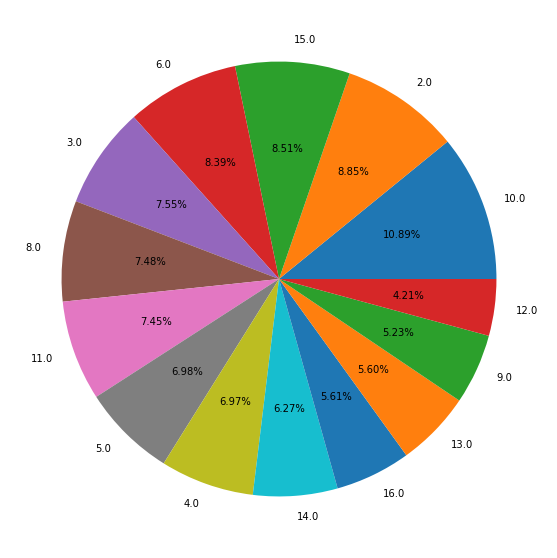

In [92]:
plt.figure(figsize=(10,10))
plt.pie(x=value_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [93]:
label_df=city_category_df.groupby('Product_Category_3')['Purchase'].mean().sort_values(ascending=False).index

In [94]:
value_df=city_category_df.groupby('Product_Category_3')['Purchase'].mean().sort_values(ascending=False).values

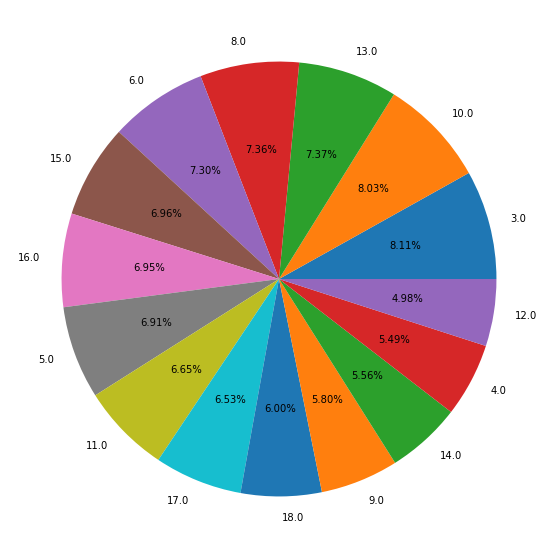

In [95]:
plt.figure(figsize=(10,10))
plt.pie(x=value_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [96]:
df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
6,M,46-50,7,B,2,1,1,8.0,17.0,19215
13,M,26-35,20,A,1,1,1,2.0,5.0,15665
14,F,51-55,9,A,1,0,5,8.0,14.0,5378
16,F,51-55,9,A,1,0,2,3.0,4.0,13055
...,...,...,...,...,...,...,...,...,...,...
545902,F,46-50,0,B,4+,1,3,4.0,12.0,8047
545904,M,26-35,6,B,2,0,6,8.0,14.0,16493
545907,M,26-35,6,B,2,0,2,3.0,10.0,3425
545908,M,26-35,6,B,2,0,1,2.0,15.0,15694


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

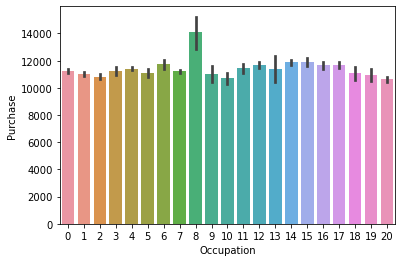

In [97]:
sns.barplot(x=city_category_df['Occupation'],y=city_category_df['Purchase'])

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

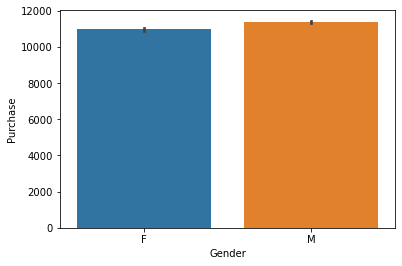

In [98]:
sns.barplot(x=city_category_df['Gender'],y=city_category_df['Purchase'])

<AxesSubplot:xlabel='Marital_Status', ylabel='Purchase'>

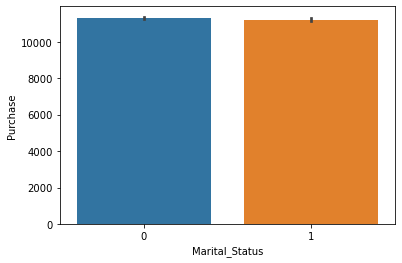

In [99]:
sns.barplot(x=city_category_df['Marital_Status'],y=city_category_df['Purchase'])

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

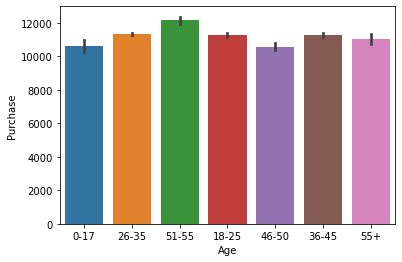

In [100]:
sns.barplot(x=city_category_df['Age'],y=city_category_df['Purchase'])

# Sales Analysis for Female Gender 

In [101]:
df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
6,M,46-50,7,B,2,1,1,8.0,17.0,19215
13,M,26-35,20,A,1,1,1,2.0,5.0,15665
14,F,51-55,9,A,1,0,5,8.0,14.0,5378
16,F,51-55,9,A,1,0,2,3.0,4.0,13055
...,...,...,...,...,...,...,...,...,...,...
545902,F,46-50,0,B,4+,1,3,4.0,12.0,8047
545904,M,26-35,6,B,2,0,6,8.0,14.0,16493
545907,M,26-35,6,B,2,0,2,3.0,10.0,3425
545908,M,26-35,6,B,2,0,1,2.0,15.0,15694


In [102]:
female_df=df.groupby("Gender").get_group("F")


In [103]:
female_df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
14,F,51-55,9,A,1,0,5,8.0,14.0,5378
16,F,51-55,9,A,1,0,2,3.0,4.0,13055
29,F,36-45,1,B,4+,1,2,4.0,8.0,16352
36,F,36-45,1,B,4+,1,2,4.0,9.0,12909
...,...,...,...,...,...,...,...,...,...,...
545890,F,26-35,15,B,4+,1,1,2.0,15.0,7846
545892,F,46-50,1,C,4+,0,6,10.0,13.0,11952
545898,F,46-50,0,B,4+,1,4,5.0,8.0,2153
545900,F,46-50,0,B,4+,1,5,8.0,18.0,8889


<AxesSubplot:xlabel='Occupation', ylabel='count'>

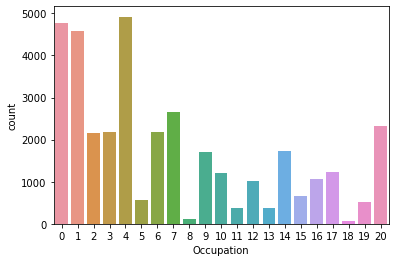

In [104]:
sns.countplot(x=female_df['Occupation'])

<AxesSubplot:xlabel='City_Category', ylabel='count'>

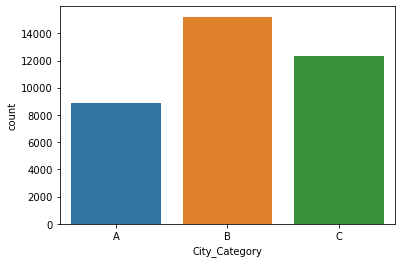

In [105]:
sns.countplot(x=female_df['City_Category'])

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

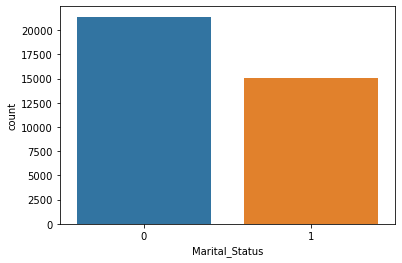

In [106]:
sns.countplot(x=female_df['Marital_Status'])

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

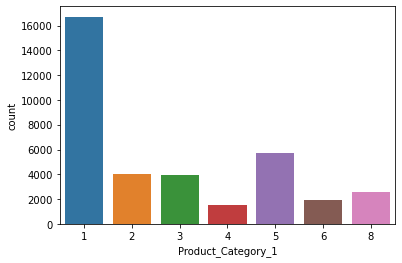

In [107]:
sns.countplot(x=female_df['Product_Category_1'])

<AxesSubplot:xlabel='Product_Category_2', ylabel='count'>

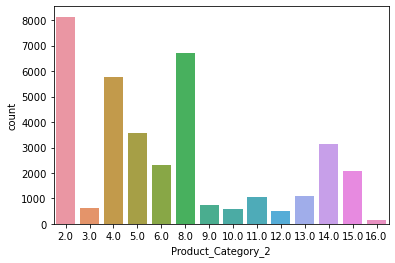

In [108]:
sns.countplot(x=female_df['Product_Category_2'])

<AxesSubplot:xlabel='Product_Category_3', ylabel='count'>

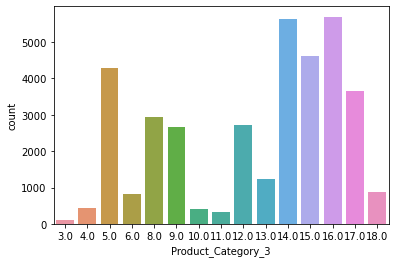

In [109]:
sns.countplot(x=female_df['Product_Category_3'])

In [110]:
label_df=female_df.groupby('Product_Category_1')['Purchase'].mean().sort_values(ascending=False).index

In [111]:
value_df=female_df.groupby('Product_Category_1')['Purchase'].mean().sort_values(ascending=False).values

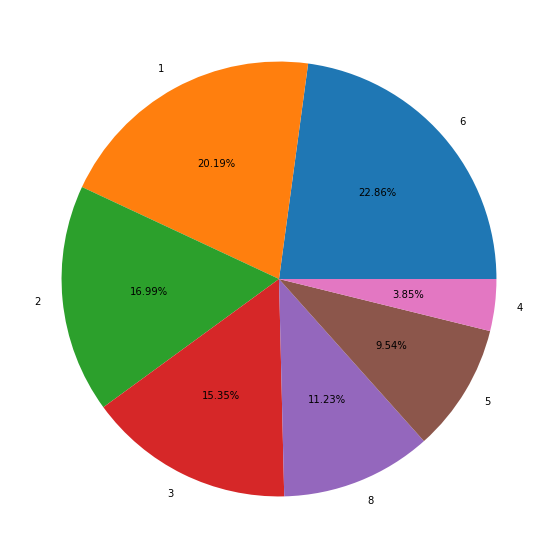

In [112]:
plt.figure(figsize=(10,10))
plt.pie(x=value_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [113]:
label_df=female_df.groupby('Product_Category_2')['Purchase'].mean().sort_values(ascending=False).index

In [114]:
value_df=female_df.groupby('Product_Category_2')['Purchase'].mean().sort_values(ascending=False).values

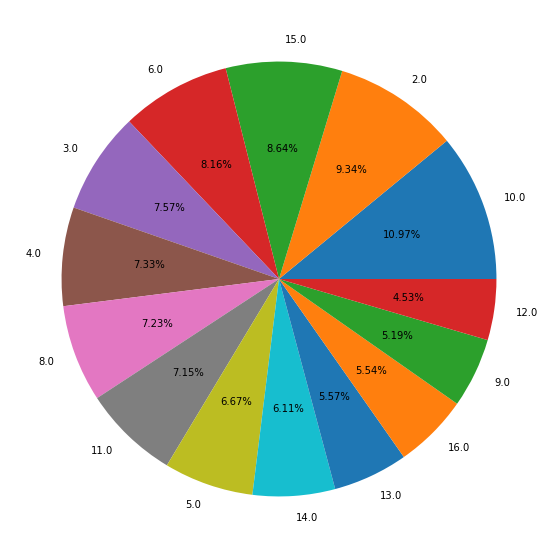

In [115]:
plt.figure(figsize=(10,10))
plt.pie(x=value_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [116]:
label_df=female_df.groupby('Product_Category_3')['Purchase'].mean().sort_values(ascending=False).index

In [117]:
value_df=female_df.groupby('Product_Category_3')['Purchase'].mean().sort_values(ascending=False).values

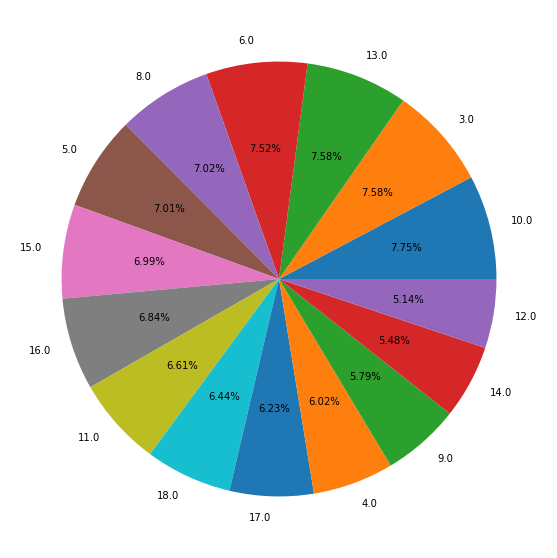

In [118]:
plt.figure(figsize=(10,10))
plt.pie(x=value_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [119]:
df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
6,M,46-50,7,B,2,1,1,8.0,17.0,19215
13,M,26-35,20,A,1,1,1,2.0,5.0,15665
14,F,51-55,9,A,1,0,5,8.0,14.0,5378
16,F,51-55,9,A,1,0,2,3.0,4.0,13055
...,...,...,...,...,...,...,...,...,...,...
545902,F,46-50,0,B,4+,1,3,4.0,12.0,8047
545904,M,26-35,6,B,2,0,6,8.0,14.0,16493
545907,M,26-35,6,B,2,0,2,3.0,10.0,3425
545908,M,26-35,6,B,2,0,1,2.0,15.0,15694


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

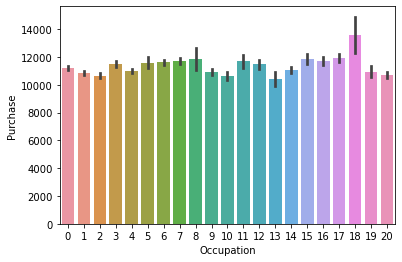

In [120]:
sns.barplot(x=female_df['Occupation'],y=female_df['Purchase'])

<AxesSubplot:xlabel='City_Category', ylabel='Purchase'>

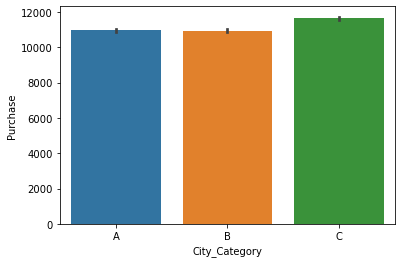

In [121]:
sns.barplot(x=female_df['City_Category'],y=female_df['Purchase'])

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

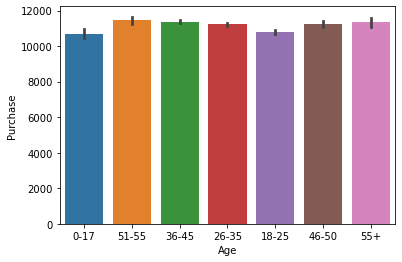

In [122]:
sns.barplot(x=female_df['Age'],y=female_df['Purchase'])

In [123]:
df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
6,M,46-50,7,B,2,1,1,8.0,17.0,19215
13,M,26-35,20,A,1,1,1,2.0,5.0,15665
14,F,51-55,9,A,1,0,5,8.0,14.0,5378
16,F,51-55,9,A,1,0,2,3.0,4.0,13055
...,...,...,...,...,...,...,...,...,...,...
545902,F,46-50,0,B,4+,1,3,4.0,12.0,8047
545904,M,26-35,6,B,2,0,6,8.0,14.0,16493
545907,M,26-35,6,B,2,0,2,3.0,10.0,3425
545908,M,26-35,6,B,2,0,1,2.0,15.0,15694


In [124]:
label_df=df.groupby(['Gender','Stay_In_Current_City_Years'])['Purchase'].mean().sort_values(ascending=False).index

In [125]:
value_df=df.groupby(['Gender','Stay_In_Current_City_Years'])['Purchase'].mean().sort_values(ascending=False).values

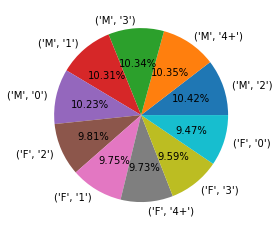

In [126]:
plt.pie(x=value_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [127]:
label_df=df.groupby(['Age','Stay_In_Current_City_Years'])['Purchase'].mean().sort_values(ascending=False).index

In [128]:
value_df=df.groupby(['Age','Stay_In_Current_City_Years'])['Purchase'].mean().sort_values(ascending=False).values

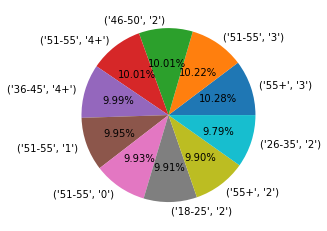

In [129]:
plt.pie(x=value_df[:10],labels=label_df[:10],autopct="%1.2f%%")
plt.show()

In [130]:
label_df=df.groupby(['Gender','Marital_Status'])['Purchase'].mean().sort_values(ascending=False).index

In [131]:
value_df=df.groupby(['Gender','Marital_Status'])['Purchase'].mean().sort_values(ascending=False).values

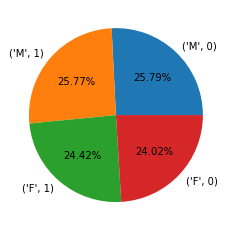

In [132]:
plt.pie(x=value_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [133]:
label_df=df.groupby(['Gender','City_Category'])['Purchase'].mean().sort_values(ascending=False).index

In [134]:
value_df=df.groupby(['Gender','City_Category'])['Purchase'].mean().sort_values(ascending=False).values

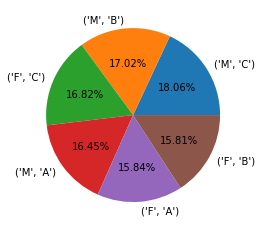

In [135]:
plt.pie(x=value_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [136]:
label_df=df.groupby(['Gender','Stay_In_Current_City_Years'])['Purchase'].mean().sort_values(ascending=False).index

In [137]:
value_df=df.groupby(['Gender','Stay_In_Current_City_Years'])['Purchase'].mean().sort_values(ascending=False).values

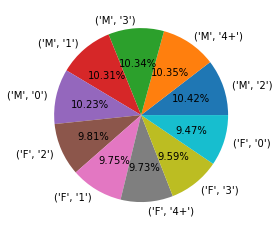

In [138]:
plt.pie(x=value_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [139]:
df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
6,M,46-50,7,B,2,1,1,8.0,17.0,19215
13,M,26-35,20,A,1,1,1,2.0,5.0,15665
14,F,51-55,9,A,1,0,5,8.0,14.0,5378
16,F,51-55,9,A,1,0,2,3.0,4.0,13055
...,...,...,...,...,...,...,...,...,...,...
545902,F,46-50,0,B,4+,1,3,4.0,12.0,8047
545904,M,26-35,6,B,2,0,6,8.0,14.0,16493
545907,M,26-35,6,B,2,0,2,3.0,10.0,3425
545908,M,26-35,6,B,2,0,1,2.0,15.0,15694


In [140]:
label_df=df.groupby("Gender")['Purchase'].mean().index


In [141]:
value_df=df.groupby("Gender")['Purchase'].mean().values


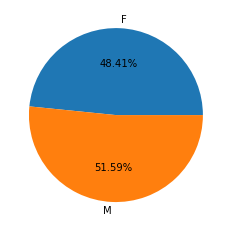

In [142]:
plt.pie(x=value_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [143]:
label_df=df.groupby("Age")['Purchase'].mean().sort_values(ascending=False).index


In [144]:
value_df=df.groupby("Age")['Purchase'].mean().sort_values(ascending=False).values


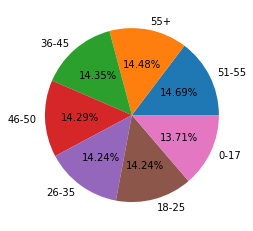

In [145]:
plt.pie(x=value_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [146]:
label_df=df.groupby("Occupation")['Purchase'].mean().sort_values(ascending=False).index


In [147]:
value_df=df.groupby("Occupation")['Purchase'].mean().sort_values(ascending=False).values


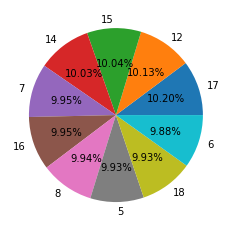

In [148]:
plt.pie(x=value_df[:10],labels=label_df[:10],autopct="%1.2f%%")
plt.show()

In [149]:
label_df=df.groupby("City_Category")['Purchase'].mean().sort_values(ascending=False).index


In [150]:
value_df=df.groupby("City_Category")['Purchase'].mean().sort_values(ascending=False).values


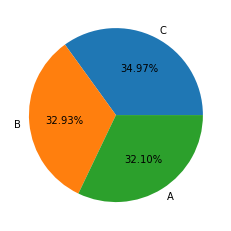

In [151]:
plt.pie(x=value_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [152]:
label_df=df.groupby("Marital_Status")['Purchase'].mean().sort_values(ascending=False).index


In [153]:
value_df=df.groupby("Marital_Status")['Purchase'].mean().sort_values(ascending=False).values


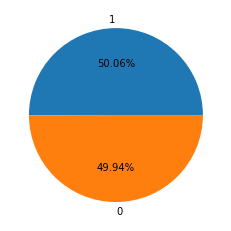

In [154]:
plt.pie(x=value_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Sales analysis for Occpation 20

In [155]:
occupation_group_df=df.groupby("Occupation").get_group(20)


In [156]:
occupation_group_df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
13,M,26-35,20,A,1,1,1,2.0,5.0,15665
336,M,36-45,20,C,0,1,1,15.0,16.0,11370
726,M,18-25,20,C,1,1,1,6.0,8.0,19391
727,M,18-25,20,C,1,1,6,8.0,14.0,12146
729,F,26-35,20,C,2,0,1,15.0,16.0,7773
...,...,...,...,...,...,...,...,...,...,...
545569,F,26-35,20,B,1,1,1,6.0,8.0,15729
545573,F,36-45,20,B,4+,1,5,8.0,14.0,3446
545575,F,36-45,20,B,4+,1,4,9.0,15.0,3466
545577,F,36-45,20,B,4+,1,3,4.0,5.0,13352


<AxesSubplot:xlabel='Gender', ylabel='count'>

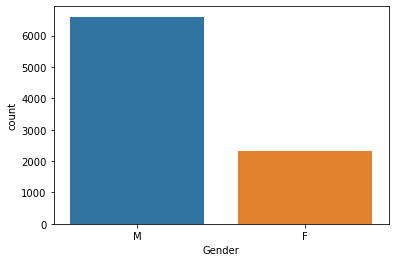

In [157]:
sns.countplot(x=occupation_group_df['Gender'])

<AxesSubplot:xlabel='Age', ylabel='count'>

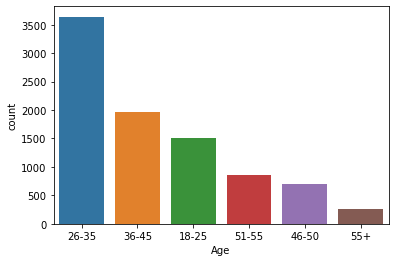

In [177]:
sns.countplot(x=occupation_group_df['Age'])

<AxesSubplot:xlabel='City_Category', ylabel='count'>

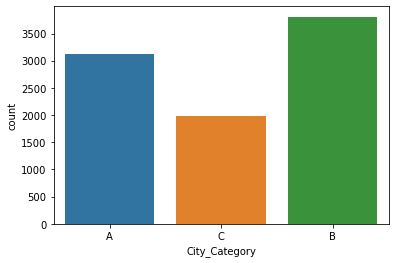

In [158]:
sns.countplot(x=occupation_group_df['City_Category'])

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

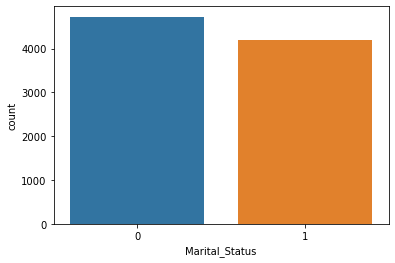

In [159]:
sns.countplot(x=occupation_group_df['Marital_Status'])

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

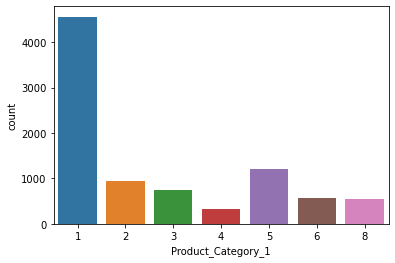

In [160]:
sns.countplot(x=occupation_group_df['Product_Category_1'])

<AxesSubplot:xlabel='Product_Category_2', ylabel='count'>

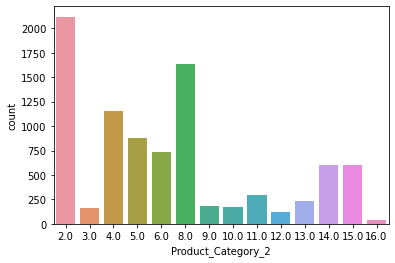

In [161]:
sns.countplot(x=occupation_group_df['Product_Category_2'])

<AxesSubplot:xlabel='Product_Category_3', ylabel='count'>

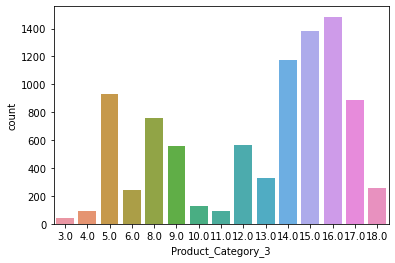

In [162]:
sns.countplot(x=occupation_group_df['Product_Category_3'])

In [163]:
label_df=occupation_group_df.groupby('Product_Category_1')['Purchase'].mean().sort_values(ascending=False).index

In [164]:
value_df=occupation_group_df.groupby('Product_Category_1')['Purchase'].mean().sort_values(ascending=False).values

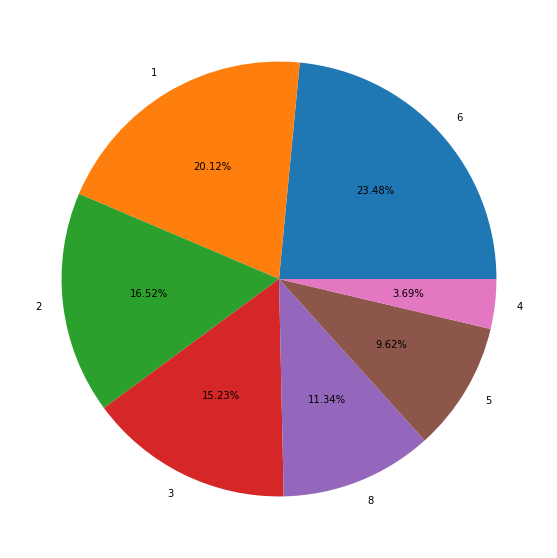

In [165]:
plt.figure(figsize=(10,10))
plt.pie(x=value_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [166]:
label_df=occupation_group_df.groupby('Product_Category_2')['Purchase'].mean().sort_values(ascending=False).index

In [167]:
value_df=occupation_group_df.groupby('Product_Category_2')['Purchase'].mean().sort_values(ascending=False).values

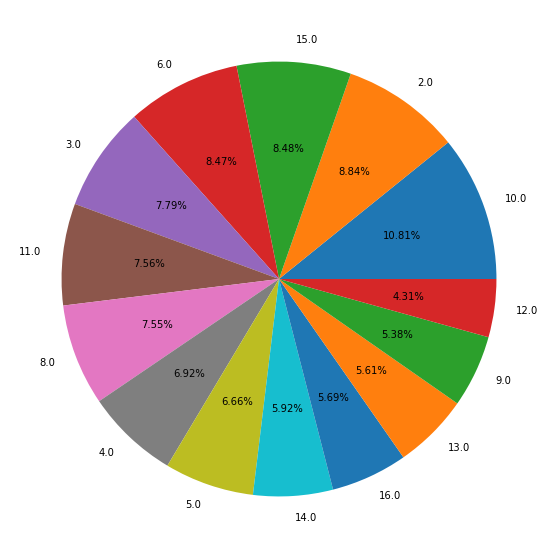

In [168]:
plt.figure(figsize=(10,10))
plt.pie(x=value_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [169]:
label_df=occupation_group_df.groupby('Product_Category_3')['Purchase'].mean().sort_values(ascending=False).index

In [170]:
value_df=occupation_group_df.groupby('Product_Category_3')['Purchase'].mean().sort_values(ascending=False).values

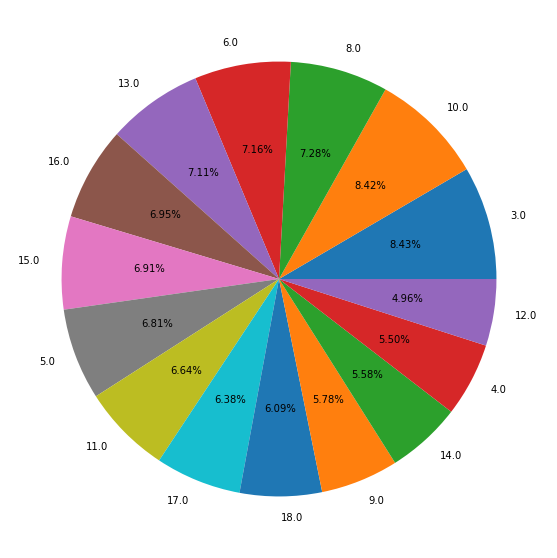

In [171]:
plt.figure(figsize=(10,10))
plt.pie(x=value_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [172]:
df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
6,M,46-50,7,B,2,1,1,8.0,17.0,19215
13,M,26-35,20,A,1,1,1,2.0,5.0,15665
14,F,51-55,9,A,1,0,5,8.0,14.0,5378
16,F,51-55,9,A,1,0,2,3.0,4.0,13055
...,...,...,...,...,...,...,...,...,...,...
545902,F,46-50,0,B,4+,1,3,4.0,12.0,8047
545904,M,26-35,6,B,2,0,6,8.0,14.0,16493
545907,M,26-35,6,B,2,0,2,3.0,10.0,3425
545908,M,26-35,6,B,2,0,1,2.0,15.0,15694


<AxesSubplot:xlabel='City_Category', ylabel='Purchase'>

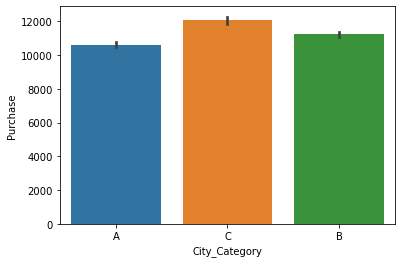

In [173]:
sns.barplot(x=occupation_group_df['City_Category'],y=occupation_group_df['Purchase'])

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

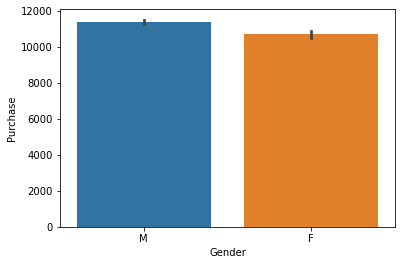

In [174]:
sns.barplot(x=occupation_group_df['Gender'],y=occupation_group_df['Purchase'])

<AxesSubplot:xlabel='Marital_Status', ylabel='Purchase'>

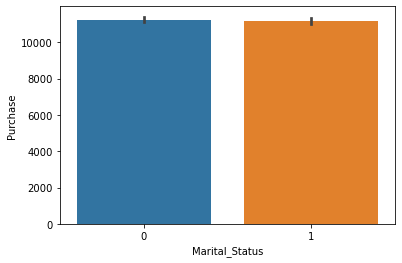

In [175]:
sns.barplot(x=occupation_group_df['Marital_Status'],y=occupation_group_df['Purchase'])

In [176]:
df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
6,M,46-50,7,B,2,1,1,8.0,17.0,19215
13,M,26-35,20,A,1,1,1,2.0,5.0,15665
14,F,51-55,9,A,1,0,5,8.0,14.0,5378
16,F,51-55,9,A,1,0,2,3.0,4.0,13055
...,...,...,...,...,...,...,...,...,...,...
545902,F,46-50,0,B,4+,1,3,4.0,12.0,8047
545904,M,26-35,6,B,2,0,6,8.0,14.0,16493
545907,M,26-35,6,B,2,0,2,3.0,10.0,3425
545908,M,26-35,6,B,2,0,1,2.0,15.0,15694
